In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [7]:
pd.set_option("display.max_rows",1000)
pd.set_option("display.max_columns", 1000)

train_path = 'https://drive.google.com/file/d/1Wq6kvIzRWH7OROa4wRob3HSLZZ8EEtUg/view?usp=sharing'
test_path = 'https://drive.google.com/file/d/1Ni0e2gb3sNRxkye7UF_uIsf41_ujo0uz/view?usp=sharing'
train_url = 'https://drive.google.com/uc?id=' + train_path.split('/')[-2] +'&confirm=t'
test_url = 'https://drive.google.com/uc?id=' + test_path.split('/')[-2]
train = pd.read_csv(train_url)
test = pd.read_csv(test_url)

In [8]:
# TRAIN DATA ANALYTIC

print('Data table with resolution: ', train.shape)
train.head(-10)

Data table with resolution:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [9]:
print('All data types')
train.dtypes

All data types


SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [10]:
print('Percentage of null dada in every column')
print((train.isnull().sum() / train.shape[0]) * 100)

Percentage of null dada in every column
SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.0

In [11]:
print('Correlation with TARGET')
print(train.corrwith(train.TARGET))

Correlation with TARGET
SK_ID_CURR                     -0.002108
TARGET                          1.000000
CNT_CHILDREN                    0.019187
AMT_INCOME_TOTAL               -0.003982
AMT_CREDIT                     -0.030369
AMT_ANNUITY                    -0.012817
AMT_GOODS_PRICE                -0.039645
REGION_POPULATION_RELATIVE     -0.037227
DAYS_BIRTH                      0.078239
DAYS_EMPLOYED                  -0.044932
DAYS_REGISTRATION               0.041975
DAYS_ID_PUBLISH                 0.051457
OWN_CAR_AGE                     0.037612
FLAG_MOBIL                      0.000534
FLAG_EMP_PHONE                  0.045982
FLAG_WORK_PHONE                 0.028524
FLAG_CONT_MOBILE                0.000370
FLAG_PHONE                     -0.023806
FLAG_EMAIL                     -0.001758
CNT_FAM_MEMBERS                 0.009308
REGION_RATING_CLIENT            0.058899
REGION_RATING_CLIENT_W_CITY     0.060893
HOUR_APPR_PROCESS_START        -0.024166
REG_REGION_NOT_LIVE_REGION      0

In [12]:
print('Duplicated data')
print(train.filter(train.duplicated() == True).sum())

Duplicated data
Series([], dtype: float64)


Balance of TARGET
AxesSubplot(0.125,0.125;0.775x0.755)


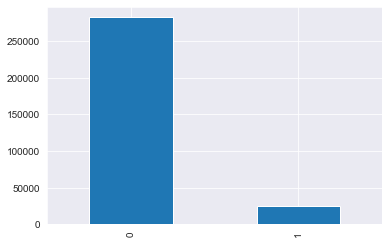

In [13]:
print('Balance of TARGET')
print(train.TARGET.value_counts().plot(kind="bar"))

In [14]:
before = train.shape[1]
data = train.dropna(axis = 'columns') # delete all null columns
print('before: ', before, "  now: ", data.shape[1])

before:  122   now:  55


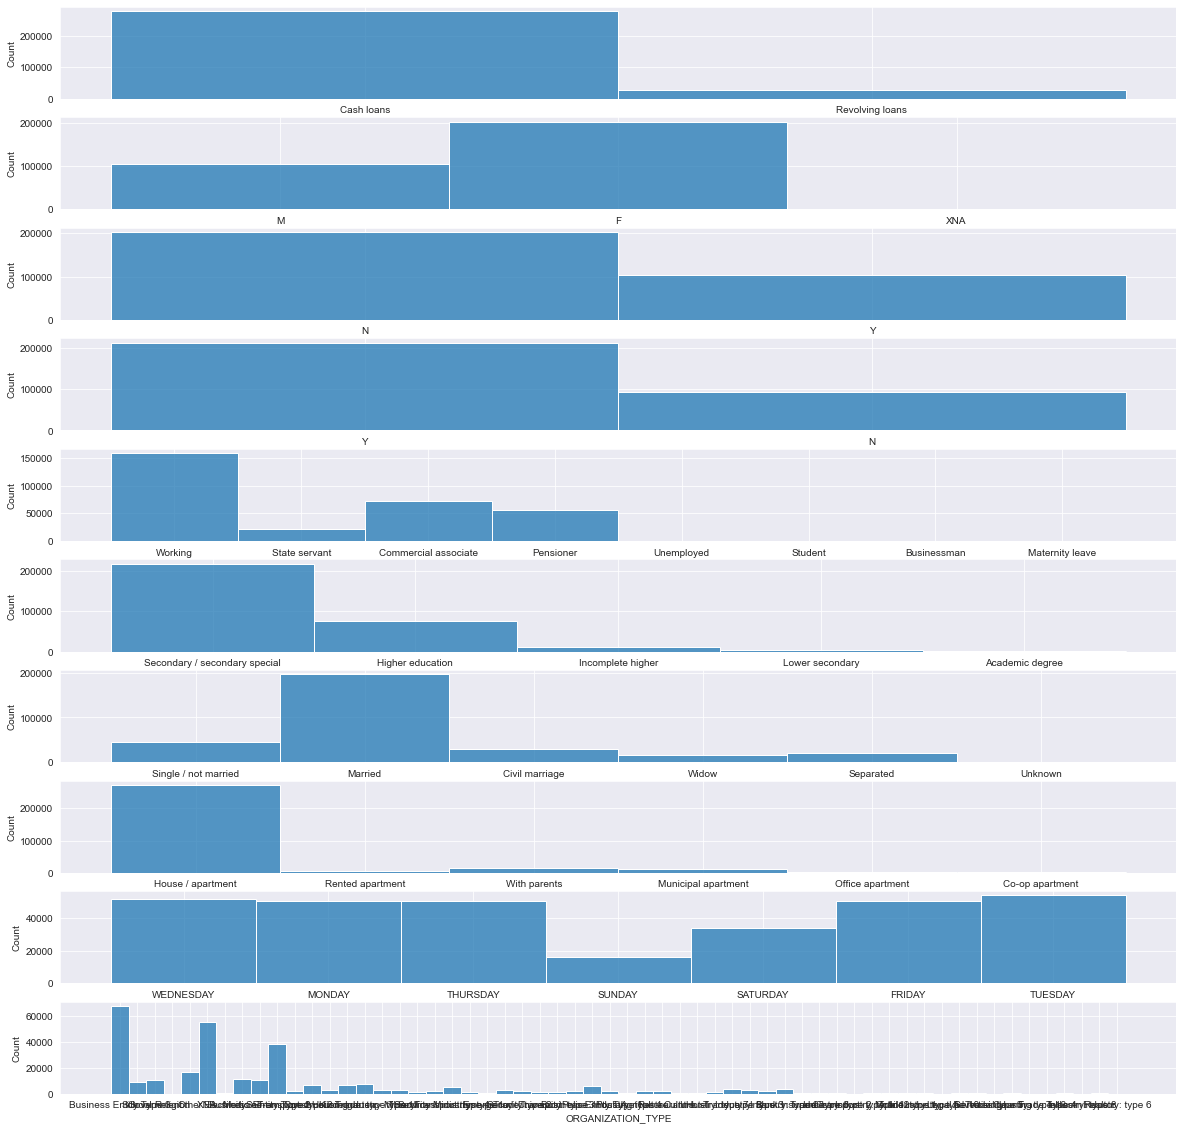

array([[<AxesSubplot:title={'center':'SK_ID_CURR'}>,
        <AxesSubplot:title={'center':'TARGET'}>,
        <AxesSubplot:title={'center':'CNT_CHILDREN'}>,
        <AxesSubplot:title={'center':'AMT_INCOME_TOTAL'}>,
        <AxesSubplot:title={'center':'AMT_CREDIT'}>,
        <AxesSubplot:title={'center':'REGION_POPULATION_RELATIVE'}>,
        <AxesSubplot:title={'center':'DAYS_BIRTH'}>],
       [<AxesSubplot:title={'center':'DAYS_EMPLOYED'}>,
        <AxesSubplot:title={'center':'DAYS_REGISTRATION'}>,
        <AxesSubplot:title={'center':'DAYS_ID_PUBLISH'}>,
        <AxesSubplot:title={'center':'FLAG_MOBIL'}>,
        <AxesSubplot:title={'center':'FLAG_EMP_PHONE'}>,
        <AxesSubplot:title={'center':'FLAG_WORK_PHONE'}>,
        <AxesSubplot:title={'center':'FLAG_CONT_MOBILE'}>],
       [<AxesSubplot:title={'center':'FLAG_PHONE'}>,
        <AxesSubplot:title={'center':'FLAG_EMAIL'}>,
        <AxesSubplot:title={'center':'REGION_RATING_CLIENT'}>,
        <AxesSubplot:title={'center':

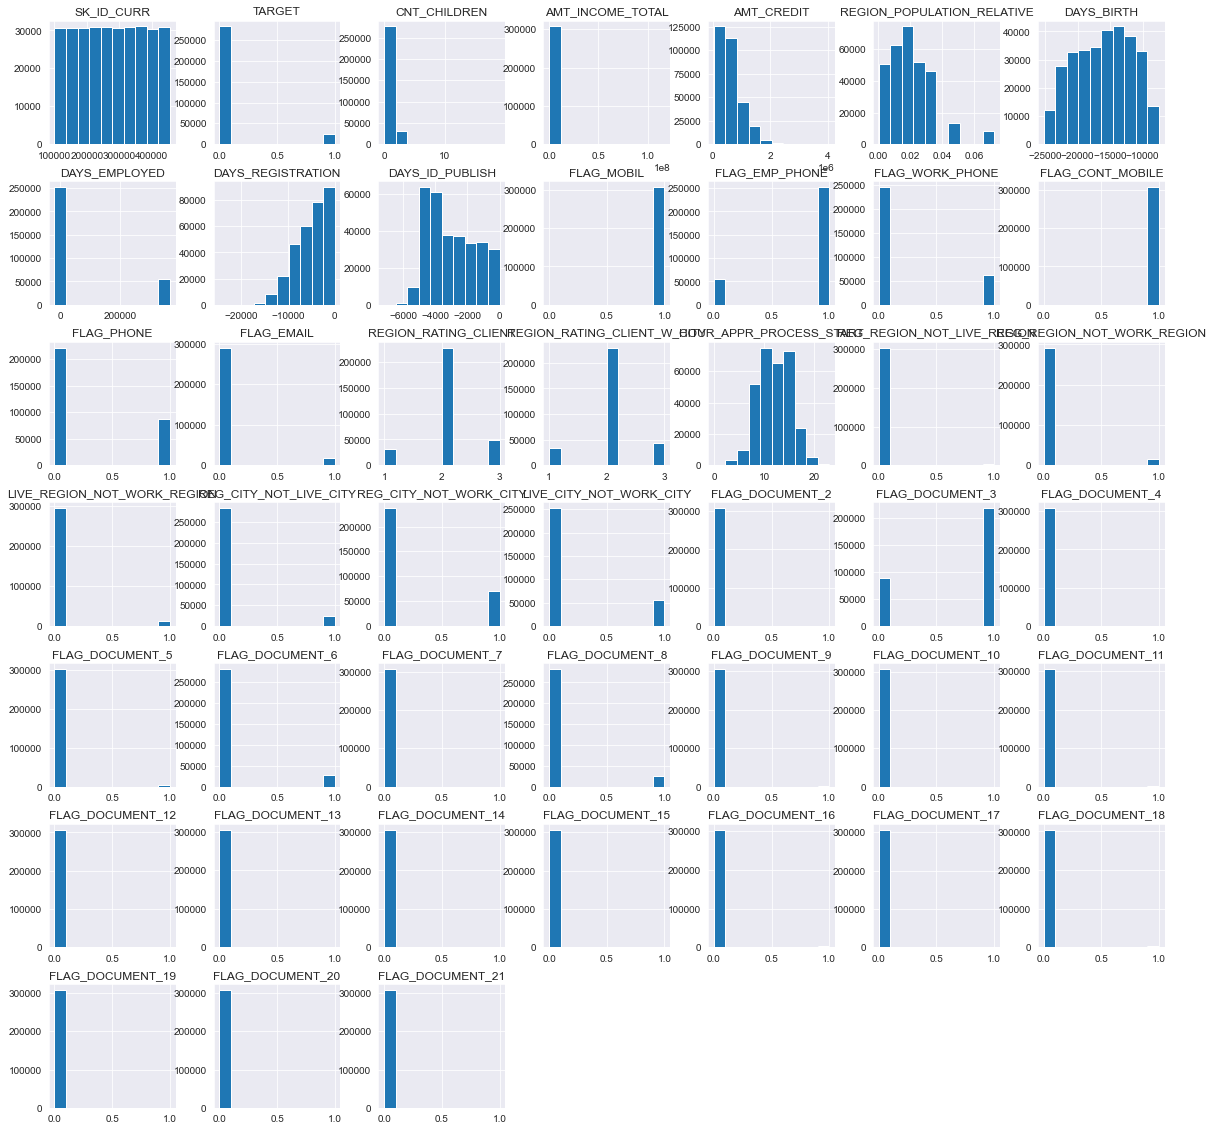

In [15]:
# SELECT A COUPLE OF COLUMNS TO WORK WITH

analytic_columns = data.select_dtypes(include = ['float64', 'int64']).columns
string_columns = data.select_dtypes(include = ['object']).columns

fig, axes = plt.subplots(nrows=len(string_columns))
fig.set_size_inches(20, 20)
for i, col in enumerate(string_columns):
  sns.histplot(data[col], ax=axes[i])
plt.show()

data[analytic_columns].hist(figsize=(20,20)) #visualyzing all columns

<AxesSubplot:>

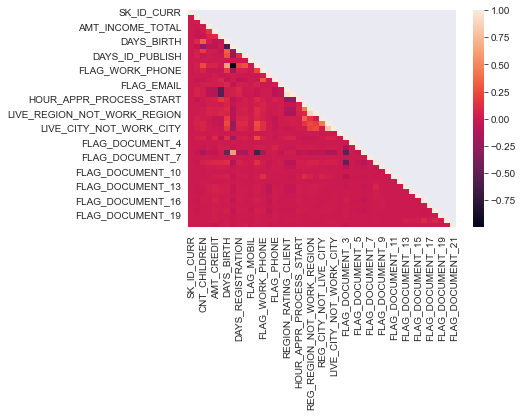

In [16]:
corrMatt = data[analytic_columns].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax = plt.subplots()
sns.heatmap(corrMatt, mask=mask) # we can skip columns with correlation higher than 0.5

In [17]:
data = train[[
    "TARGET", "NAME_CONTRACT_TYPE", "CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE",
    "AMT_INCOME_TOTAL", "AMT_CREDIT", "DAYS_EMPLOYED", "DAYS_BIRTH", "REGION_RATING_CLIENT_W_CITY"
]]

selected_columns = data.columns # select a couple of appropriate columns
analytic_columns = data.select_dtypes(include = ['float64', 'int64']).columns
string_columns = data.select_dtypes(include = ['object']).columns # need to divide number and string columns

print(selected_columns)
print(analytic_columns)
print(string_columns)

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'DAYS_EMPLOYED', 'DAYS_BIRTH',
       'REGION_RATING_CLIENT_W_CITY'],
      dtype='object')
Index(['TARGET', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'DAYS_EMPLOYED',
       'DAYS_BIRTH', 'REGION_RATING_CLIENT_W_CITY'],
      dtype='object')
Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE'],
      dtype='object')


In [18]:
# SET CLASSIFICATOR ON TEST DATA

transformer = ColumnTransformer(
     transformers = [
         ('numerical', StandardScaler(), analytic_columns.drop('TARGET')),
         ('categorical', OneHotEncoder(), string_columns)
     ],
)

data_train = data.drop("TARGET", axis=1)
data_train_ = pd.DataFrame(transformer.fit_transform(data_train))

test_columns = selected_columns.drop("TARGET")

data_test = test[test_columns]
data_test_ = pd.DataFrame(transformer.transform(data_test))
data_test_.head(-10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
0,-0.142533,-0.075097,-0.468192,-0.734193,-0.062699,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,-0.294354,-0.934825,-0.483339,-0.464485,-0.062699,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.142129,0.159601,-0.483262,-0.916824,-0.062699,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.616567,2.424840,-0.464915,0.472274,-0.062699,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.047242,0.065776,-0.467215,0.686757,-0.062699,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48729,-0.370264,-1.152888,-0.462777,0.658113,-0.062699,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
48730,-0.047646,-0.382447,-0.478314,0.004124,-0.062699,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
48731,-0.237421,-0.370260,2.133617,-1.030940,-0.062699,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
48732,0.085197,-0.296469,-0.465127,-0.384742,-0.062699,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [19]:
# TEST DATA WITH VALIDATION

def PredictModel(model, description):
  model.fit(train_split_x, train_split_y)
  train_predictions = model.predict(train_split_x)
  validate_predictions = model.predict(validate_x)

  print(description)
  print("Train.\n Accuracy:", accuracy_score(train_split_y, train_predictions), "ROC_AUC: ", roc_auc_score(train_split_y, train_predictions))
  print("Validate.\n Accuracy:", accuracy_score(validate_y, validate_predictions), "ROC_AUC: ", roc_auc_score(validate_y, validate_predictions))

trainX = data_train_
trainY = data['TARGET']
train_split_x, validate_x, train_split_y, validate_y = train_test_split(trainX, trainY, test_size=0.2)

PredictModel(LogisticRegression(max_iter=1000), "default lr")
PredictModel(LogisticRegression(class_weight = "balanced", max_iter=1000), "balanced lr")

default lr
Train.
 Accuracy: 0.9186164677571461 ROC_AUC:  0.5001343626018387
Validate.
 Accuracy: 0.9218249516283759 ROC_AUC:  0.5001640232791889
balanced lr
Train.
 Accuracy: 0.604358394848948 ROC_AUC:  0.6138673215026826
Validate.
 Accuracy: 0.60263726972668 ROC_AUC:  0.6080971589107361
